In [3]:
!rm -rf IoT_project_1
!git clone https://github.com/paflou/IoT_project_1
import pandas as pd
%load_ext autoreload
%autoreload 2

Cloning into 'IoT_project_1'...
remote: Enumerating objects: 3564, done.
remote: Counting objects: 100% (3564/3564), done.
remote: Compressing objects: 100% (1189/1189), done.
remote: Total 3564 (delta 2360), reused 3549 (delta 2352), pack-reused 0 (from 0)
Receiving objects: 100% (3564/3564), 4.49 MiB | 4.66 MiB/s, done.
Resolving deltas: 100% (2360/2360), done.


# Data processing

Load the csv file with the data using the pandas library.

In [4]:
df = pd.read_csv("IoT_project_1/my_nullnet/export.csv")
print(df)

       ID                      Time  Count  Temperature  Humidity
0       0  2025-05-14T12:34:02.386Z      0        26.73     52.93
1       1  2025-05-14T12:34:05.741Z      0        27.50     53.12
2       0  2025-05-14T12:34:22.390Z      1        26.73     53.63
3       1  2025-05-14T12:34:25.767Z      1        27.20     55.70
4       0  2025-05-14T12:34:42.416Z      2        26.76     53.31
...    ..                       ...    ...          ...       ...
43395   0  2025-05-19T13:08:12.259Z  21703        23.68     53.15
43396   1  2025-05-19T13:08:17.106Z  21703        24.73     52.40
43397   0  2025-05-19T13:08:32.259Z  21704        23.70     53.90
43398   1  2025-05-19T13:08:37.068Z  21704        24.73     52.40
43399   0  2025-05-19T13:08:52.243Z  21705        23.68     53.12

[43400 rows x 5 columns]


Change the dtype of the "time" column to datetime64
* tip: use the pd.to_datetime function()

:Create a new dataframe with the "time" column and the column with sensor data of your interest

In [5]:
df_temp = df[['Time', 'Temperature']].copy()
df_hum = df[['Time', 'Humidity']].copy()

df_hum['Time'] = pd.to_datetime(df['Time'])
df_temp['Time'] = pd.to_datetime(df['Time'])

print(df_temp)
print(df_hum)

                                  Time  Temperature
0     2025-05-14 12:34:02.386000+00:00        26.73
1     2025-05-14 12:34:05.741000+00:00        27.50
2     2025-05-14 12:34:22.390000+00:00        26.73
3     2025-05-14 12:34:25.767000+00:00        27.20
4     2025-05-14 12:34:42.416000+00:00        26.76
...                                ...          ...
43395 2025-05-19 13:08:12.259000+00:00        23.68
43396 2025-05-19 13:08:17.106000+00:00        24.73
43397 2025-05-19 13:08:32.259000+00:00        23.70
43398 2025-05-19 13:08:37.068000+00:00        24.73
43399 2025-05-19 13:08:52.243000+00:00        23.68

[43400 rows x 2 columns]
                                  Time  Humidity
0     2025-05-14 12:34:02.386000+00:00     52.93
1     2025-05-14 12:34:05.741000+00:00     53.12
2     2025-05-14 12:34:22.390000+00:00     53.63
3     2025-05-14 12:34:25.767000+00:00     55.70
4     2025-05-14 12:34:42.416000+00:00     53.31
...                                ...       ...
43395 2

:At this point it is advisasble to resample the dataframe (i.e. hourly) and create a new one, as the data is sampled per 20 seconds, and the statistical models will not be able to handle all the data at once.


Tips:
* set the index of the dataframe to be the "time" column
* use .resample() of the pandas library function to resample the dataset and get the mean for each timestamp you create
* store this new dataframe to an appropriately named one.

In [6]:
df_hum.set_index('Time', inplace=True)
df_temp.set_index('Time', inplace=True)

temperature_df_hourly = df_temp.resample('h').mean()
humidity_df_hourly = df_hum.resample('h').mean()
print(temperature_df_hourly)
print(humidity_df_hourly)

                           Temperature
Time                                  
2025-05-14 12:00:00+00:00    26.421987
2025-05-14 13:00:00+00:00    26.025667
2025-05-14 14:00:00+00:00    25.897028
2025-05-14 15:00:00+00:00    25.804722
2025-05-14 16:00:00+00:00    25.807444
...                                ...
2025-05-19 09:00:00+00:00    23.996861
2025-05-19 10:00:00+00:00    24.023333
2025-05-19 11:00:00+00:00    24.090722
2025-05-19 12:00:00+00:00    24.244903
2025-05-19 13:00:00+00:00    24.181509

[122 rows x 1 columns]
                            Humidity
Time                                
2025-05-14 12:00:00+00:00  54.799231
2025-05-14 13:00:00+00:00  50.985000
2025-05-14 14:00:00+00:00  48.546194
2025-05-14 15:00:00+00:00  48.347417
2025-05-14 16:00:00+00:00  50.061222
...                              ...
2025-05-19 09:00:00+00:00  51.390750
2025-05-19 10:00:00+00:00  53.380722
2025-05-19 11:00:00+00:00  54.708694
2025-05-19 12:00:00+00:00  53.595571
2025-05-19 13:00:00+00:00

\Use the new dataframe you created to create an array with the values of the sensor and name it approprietly.

# Statistical Models

## ARIMA model

In [7]:
# import the needed packages
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

Set a new variable that will hold the column of the dataframe with the sensor data as a list and name it approprietly.

In [8]:
temperature_series = temperature_df_hourly['Temperature']
humidity_series = humidity_df_hourly['Humidity']
print(temperature_df_hourly.columns)
print(humidity_df_hourly.columns)

Index(['Temperature'], dtype='object')
Index(['Humidity'], dtype='object')


In [9]:
train_temperature = temperature_series[:int(len(temperature_series) * 0.7)]
test_temperature = temperature_series[int(len(temperature_series) * 0.7):]

train_humidity = humidity_series[:int(len(humidity_series) * 0.7)]
test_humidity = humidity_series[int(len(humidity_series) * 0.7):]


Load an ARIMA model and fit it to the data

In [10]:
# Temperature model
model_temp = ARIMA(train_temperature, order=(30, 1, 1))
model_temp_fit = model_temp.fit()

# Humidity model
model_hum = ARIMA(train_humidity, order=(3, 1, 2))
model_hum_fit = model_hum.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Make a forecast for as many steps as you want (prefferebly the same number of values as test set).

In [11]:
forecast_temp = model_temp_fit.forecast(steps=len(test_temperature))
forecast_hum = model_hum_fit.forecast(steps=len(test_humidity))

Plot the results Actual vs Predicted values using matplotlib.

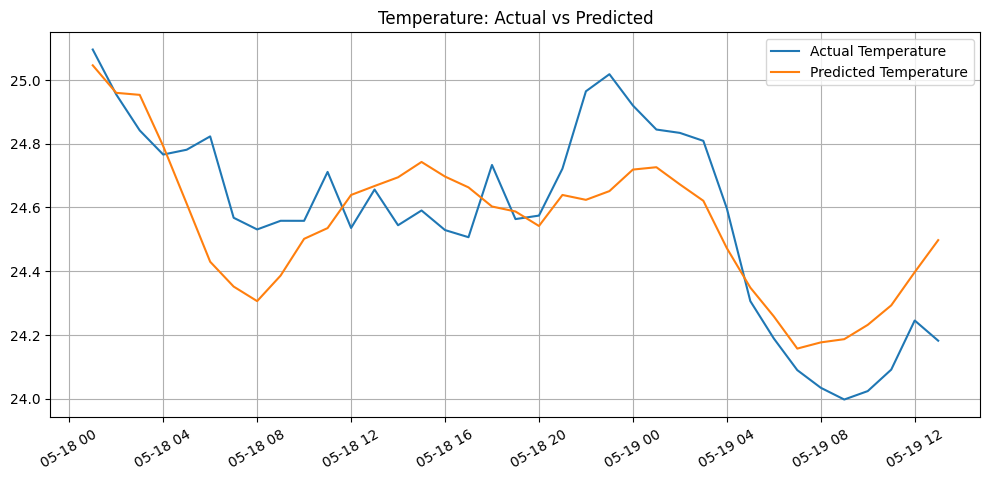

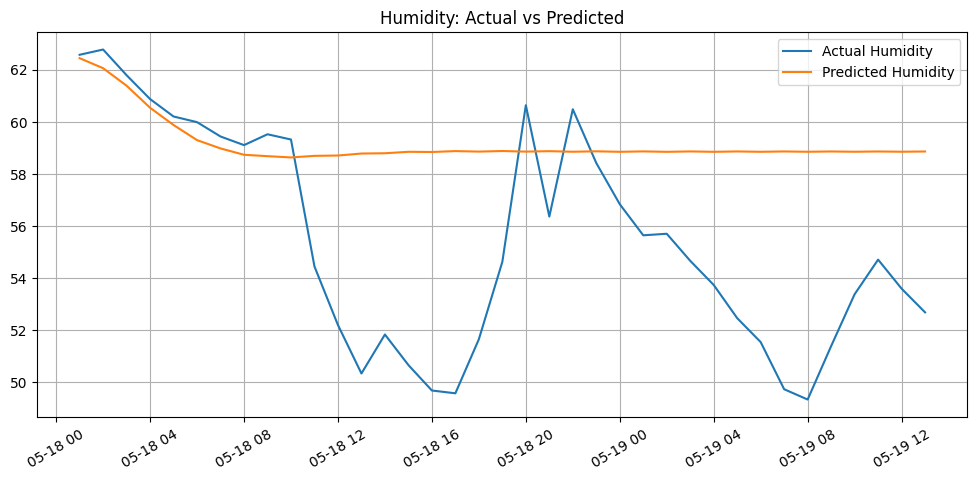

In [12]:
# Temperature plot
plt.figure(figsize=(12, 5))
plt.plot(test_temperature, label='Actual Temperature')
plt.plot(forecast_temp, label='Predicted Temperature')
plt.title('Temperature: Actual vs Predicted')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.show()

# Humidity plot
plt.figure(figsize=(12, 5))
plt.plot(test_humidity, label='Actual Humidity')
plt.plot(forecast_hum, label='Predicted Humidity')
plt.title('Humidity: Actual vs Predicted')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.show()


Calculate the below metrics for the model

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# temperature
y_true = test_temperature
y_pred = forecast_temp

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)

# Print results
print("Temperature:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape * 100:.2f}%")

# Humidity
y_true = test_humidity
y_pred = forecast_hum

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)

# Print results
print("\nHumidity:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape * 100:.2f}%")

Temperature:
MAE: 0.149
MSE: 0.031
RMSE: 0.176
MAPE: 0.61%

Humidity:
MAE: 4.164
MSE: 27.207
RMSE: 5.216
MAPE: 7.96%


# SARIMAX model
For the sarima model the same steps as the ARIMA model should be followed. Only the model call changes.

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Temperature SARIMAX model
model_sar_temp = SARIMAX(train_temperature, order=(3,1,1), seasonal_order=(1,1,0,24))
model_sar_temp_fit = model_sar_temp.fit()

# Humidity SARIMAX model
model_sar_hum = SARIMAX(train_humidity, order=(3,1,2), seasonal_order=(1,1,0,24))
model_sar_hum_fit = model_sar_hum.fit()


In [15]:
# Fit temperature SARIMAX model
model_sar_temp_fit = model_sar_temp.fit()

# Fit humidity SARIMAX model
model_sar_hum_fit = model_sar_hum.fit()


In [16]:
# Forecast temperature
forecast_temp = model_sar_temp_fit.forecast(steps=len(test_temperature))

# Forecast humidity
forecast_hum = model_sar_hum_fit.forecast(steps=len(test_humidity))


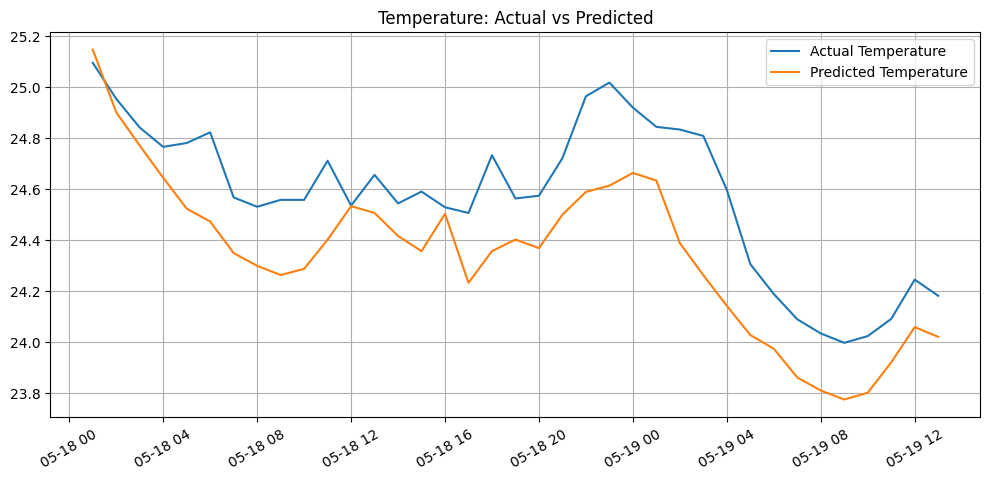

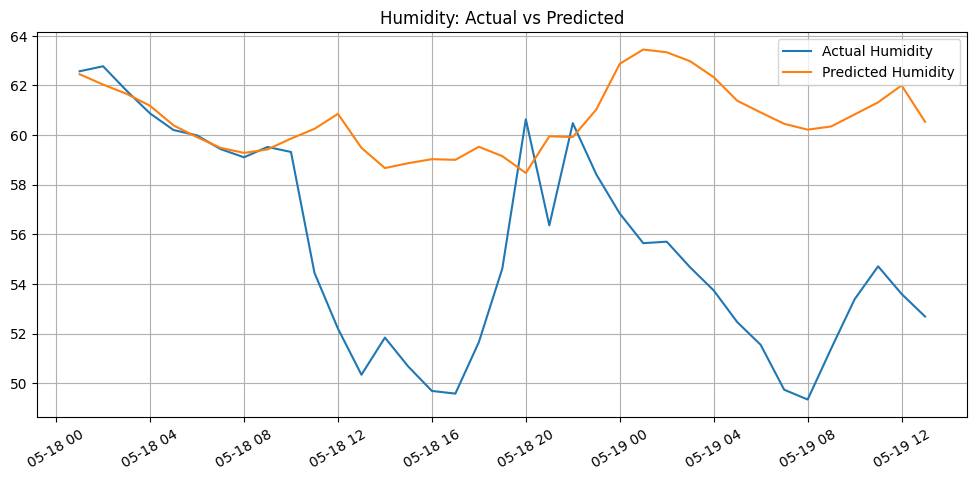

In [17]:
import matplotlib.pyplot as plt

# Temperature plot
plt.figure(figsize=(12, 5))
plt.plot(test_temperature, label='Actual Temperature')
plt.plot(forecast_temp, label='Predicted Temperature')
plt.title('Temperature: Actual vs Predicted')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.show()

# Humidity plot
plt.figure(figsize=(12, 5))
plt.plot(test_humidity, label='Actual Humidity')
plt.plot(forecast_hum, label='Predicted Humidity')
plt.title('Humidity: Actual vs Predicted')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.show()

Calculate the below metrics for the model

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Temperature metrics
mae_temp = mean_absolute_error(test_temperature, forecast_temp)
mse_temp = mean_squared_error(test_temperature, forecast_temp)
rmse_temp = np.sqrt(mse_temp)
mape_temp = mean_absolute_percentage_error(test_temperature, forecast_temp)

print("Temperature Metrics:")
print(f"MAE: {mae_temp:.3f}")
print(f"MSE: {mse_temp:.3f}")
print(f"RMSE: {rmse_temp:.3f}")
print(f"MAPE: {mape_temp * 100:.2f}%\n")

# Humidity metrics
mae_hum = mean_absolute_error(test_humidity, forecast_hum)
mse_hum = mean_squared_error(test_humidity, forecast_hum)
rmse_hum = np.sqrt(mse_hum)
mape_hum = mean_absolute_percentage_error(test_humidity, forecast_hum)

print("Humidity Metrics:")
print(f"MAE: {mae_hum:.3f}")
print(f"MSE: {mse_hum:.3f}")
print(f"RMSE: {rmse_hum:.3f}")
print(f"MAPE: {mape_hum * 100:.2f}%")

Temperature Metrics:
MAE: 0.233
MSE: 0.068
RMSE: 0.262
MAPE: 0.95%

Humidity Metrics:
MAE: 5.369
MSE: 43.262
RMSE: 6.577
MAPE: 10.21%


### You can perform the analysis for whichever sensor you choose. You may do it for all of them or one. It is advised to tune the parameters to achieve a better results but it is not necessary. You can also use GridSearchCV form sklearn to automatically optimize the parameters.

# Neural Network Models

## Data Processing and preparation

For the machine learning models the processing of the dataset changes a bit.

In [19]:
# For temperature
temperature = df_temp['Temperature'].resample('h').mean()

mean_temp = temperature.mean()
std_temp = temperature.std()
temperature_norm = (temperature - mean_temp) / std_temp

print("Temperature Mean:", mean_temp)
print("Temperature Std:", std_temp)


# For humidity
humidity = df_hum['Humidity'].resample('h').mean()

mean_hum = humidity.mean()
std_hum = humidity.std()
humidity_norm = (humidity - mean_hum) / std_hum

print("Humidity Mean:", mean_hum)
print("Humidity Std:", std_hum)


Temperature Mean: 25.288999264031535
Temperature Std: 0.678691307644451
Humidity Mean: 56.40461184674906
Humidity Std: 3.4392344033778643


Again, it is suggested you have already resampled the data as training with a large amount of instances coulf be really slow especially withoutt a dedicated GPU for acceleration. For a Machine Learning Neural Network Model we need to transform our data into information and target values. To do that we must create an array of features (past values) with a target (value after these 10 values for example).

In [20]:
look_back = 60

# Temperature sequences
X_temp = []
y_temp = []
for i in range(look_back, len(temperature_norm)):
    X_temp.append(temperature_norm[i-look_back:i])
    y_temp.append(temperature_norm[i])

X_temp = np.array(X_temp)
y_temp = np.array(y_temp)

train_size_temp = int(len(X_temp) * 0.7)
X_train_temp, y_train_temp = X_temp[:train_size_temp], y_temp[:train_size_temp]
X_test_temp, y_test_temp = X_temp[train_size_temp:], y_temp[train_size_temp:]

X_train_temp = np.reshape(X_train_temp, (X_train_temp.shape[0], X_train_temp.shape[1], 1))
X_test_temp = np.reshape(X_test_temp, (X_test_temp.shape[0], X_test_temp.shape[1], 1))


# Humidity sequences
X_hum = []
y_hum = []
for i in range(look_back, len(humidity_norm)):
    X_hum.append(humidity_norm[i-look_back:i])
    y_hum.append(humidity_norm[i])

X_hum = np.array(X_hum)
y_hum = np.array(y_hum)

train_size_hum = int(len(X_hum) * 0.7)
X_train_hum, y_train_hum = X_hum[:train_size_hum], y_hum[:train_size_hum]
X_test_hum, y_test_hum = X_hum[train_size_hum:], y_hum[train_size_hum:]

X_train_hum = np.reshape(X_train_hum, (X_train_hum.shape[0], X_train_hum.shape[1], 1))
X_test_hum = np.reshape(X_test_hum, (X_test_hum.shape[0], X_test_hum.shape[1], 1))


/tmp/ipython-input-20-4041354640.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_temp.append(temperature_norm[i])
/tmp/ipython-input-20-4041354640.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hum.append(humidity_norm[i])


The above requires array comprehension but as it the not the focus of this project please just change the look back according to the dataset you created (resample, original dataset etc.)

#### LSTM

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [22]:
# Temperature LSTM model
model_temp = Sequential()
model_temp.add(LSTM(50, input_shape=(look_back, 1)))
model_temp.add(Dense(1))
model_temp.compile(loss='mean_squared_error', optimizer='adam')

# Humidity LSTM model
model_hum = Sequential()
model_hum.add(LSTM(50, input_shape=(look_back, 1)))
model_hum.add(Dense(1))
model_hum.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Train temperature LSTM model
history_temp = model_temp.fit(X_train_temp, y_train_temp, epochs=100, batch_size=32)

# Train humidity LSTM model
history_hum = model_hum.fit(X_train_hum, y_train_hum, epochs=100, batch_size=32)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.7390
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - loss: 0.6264
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.5386
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4652
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3896 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3274
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2460
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2016
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1661 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1263
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1062
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0918 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0919 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1109
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1023
Epoch 16/100
2

Plot the training accuracy over the course of the training and loss from the model.history paramater

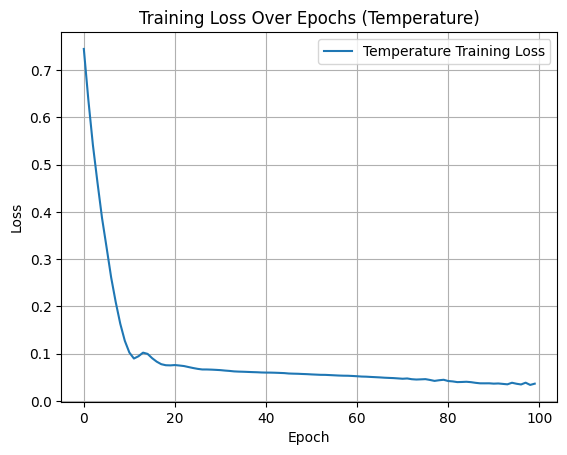

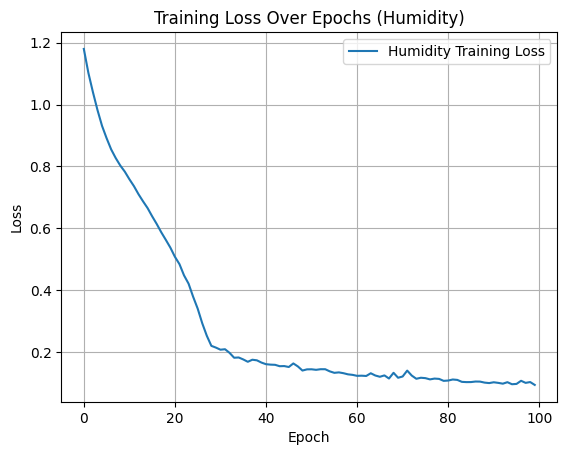

In [24]:
plt.plot(history_temp.history['loss'], label='Temperature Training Loss')
plt.title('Training Loss Over Epochs (Temperature)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history_hum.history['loss'], label='Humidity Training Loss')
plt.title('Training Loss Over Epochs (Humidity)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


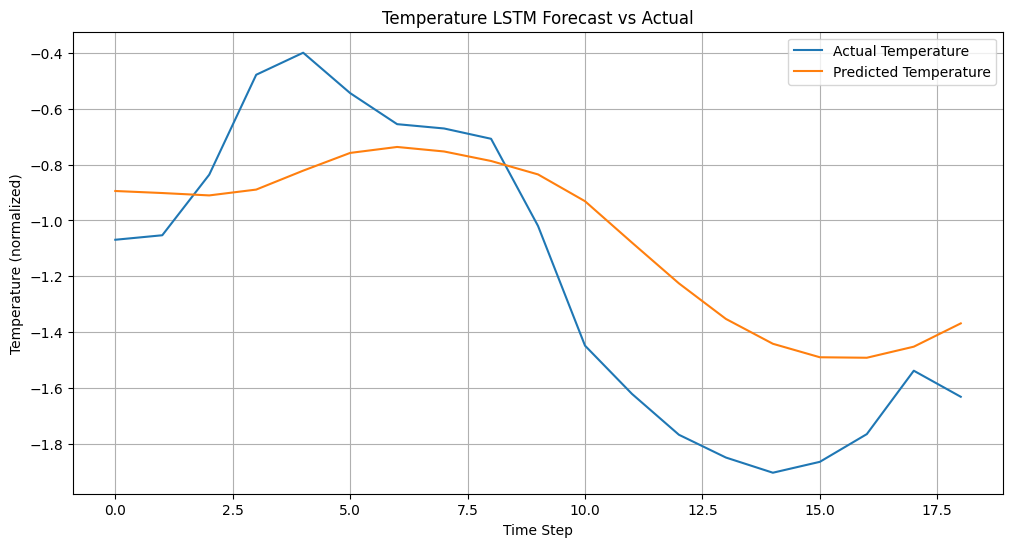

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


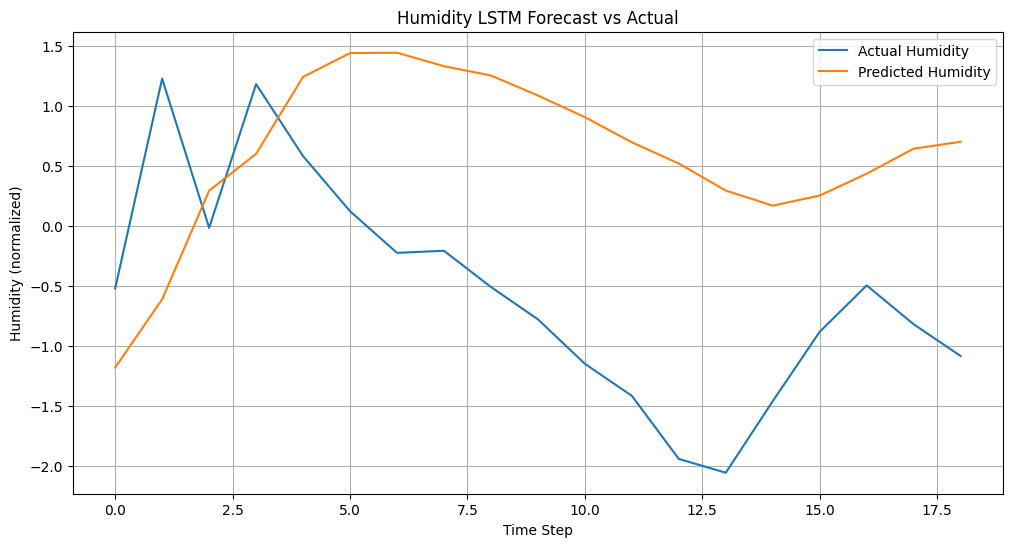

In [25]:
# Predict temperature
forecast_temp = model_temp.predict(X_test_temp)

plt.figure(figsize=(12, 6))
plt.plot(y_test_temp, label='Actual Temperature')
plt.plot(forecast_temp, label='Predicted Temperature')
plt.title('Temperature LSTM Forecast vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Temperature (normalized)')
plt.legend()
plt.grid(True)
plt.show()


# Predict humidity
forecast_hum = model_hum.predict(X_test_hum)

plt.figure(figsize=(12, 6))
plt.plot(y_test_hum, label='Actual Humidity')
plt.plot(forecast_hum, label='Predicted Humidity')
plt.title('Humidity LSTM Forecast vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Humidity (normalized)')
plt.legend()
plt.grid(True)
plt.show()


Calculate the mean_absolute_error, mean_squared_error and mean_absolute_percentage_error and the accuracy of the model.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# For Temperature
y_pred_temp = forecast_temp.flatten()

mae_temp = mean_absolute_error(y_test_temp, y_pred_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
rmse_temp = np.sqrt(mse_temp)
mape_temp = np.mean(np.abs((y_test_temp - y_pred_temp) / y_test_temp)) * 100
accuracy_temp = 100 - mape_temp

print("Temperature Metrics:")
print(f"MAE: {mae_temp:.3f}")
print(f"MSE: {mse_temp:.3f}")
print(f"RMSE: {rmse_temp:.3f}")
print(f"MAPE: {mape_temp:.2f}%")
print(f"Accuracy: {accuracy_temp:.2f}%\n")


# For Humidity
y_pred_hum = forecast_hum.flatten()

mae_hum = mean_absolute_error(y_test_hum, y_pred_hum)
mse_hum = mean_squared_error(y_test_hum, y_pred_hum)
rmse_hum = np.sqrt(mse_hum)
mape_hum = np.mean(np.abs((y_test_hum - y_pred_hum) / y_test_hum)) * 100
accuracy_hum = 100 - mape_hum

print("Humidity Metrics:")
print(f"MAE: {mae_hum:.3f}")
print(f"MSE: {mse_hum:.3f}")
print(f"RMSE: {rmse_hum:.3f}")
print(f"MAPE: {mape_hum:.2f}%")
print(f"Accuracy: {accuracy_hum:.2f}%")


Temperature Metrics:
MAE: 0.286
MSE: 0.111
RMSE: 0.334
MAPE: 28.06%
Accuracy: 71.94%

Humidity Metrics:
MAE: 1.480
MSE: 2.556
RMSE: 1.599
MAPE: 383.00%
Accuracy: -283.00%


#### RNN Model

\Bonus: Only the model changes between these two examples. Create your own SimpleRNN model using the LSTM model as a guidline and calculate the same training metrics as before as well as visualize the same results.

In [63]:
from keras.layers import  SimpleRNN

In [64]:
# Temperature SimpleRNN model
model_temp_rnn = Sequential()
model_temp_rnn.add(SimpleRNN(70, input_shape=(look_back, 1)))
model_temp_rnn.add(Dense(1))
model_temp_rnn.compile(loss='mean_squared_error', optimizer='adam')

# Humidity SimpleRNN model
model_hum_rnn = Sequential()
model_hum_rnn.add(SimpleRNN(70, input_shape=(look_back, 1)))
model_hum_rnn.add(Dense(1))
model_hum_rnn.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
# Train temperature RNN model
history_temp = model_temp.fit(X_train_temp, y_train_temp, epochs=100, batch_size=32)

# Train humidity RNN model
history_hum = model_hum.fit(X_train_hum, y_train_hum, epochs=100, batch_size=32)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0088
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0093
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0086
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0076
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0092
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0092
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0095
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0092
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0091
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0100
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0096
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0087
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0092 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0083 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0091
Epoch 16/100
2/2 

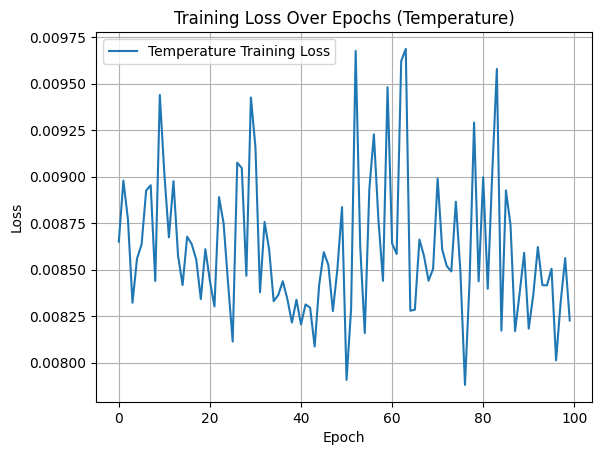

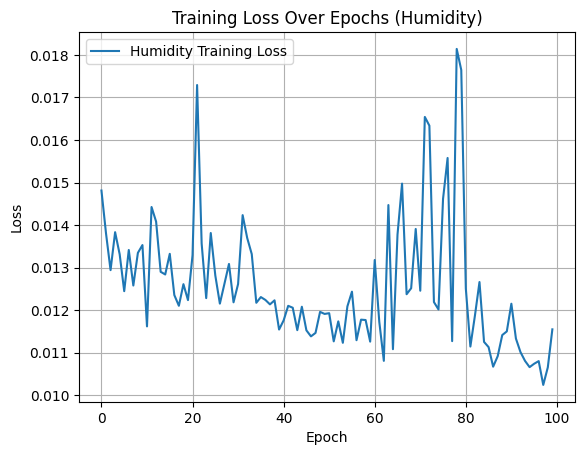

In [66]:
plt.plot(history_temp.history['loss'], label='Temperature Training Loss')
plt.title('Training Loss Over Epochs (Temperature)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history_hum.history['loss'], label='Humidity Training Loss')
plt.title('Training Loss Over Epochs (Humidity)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


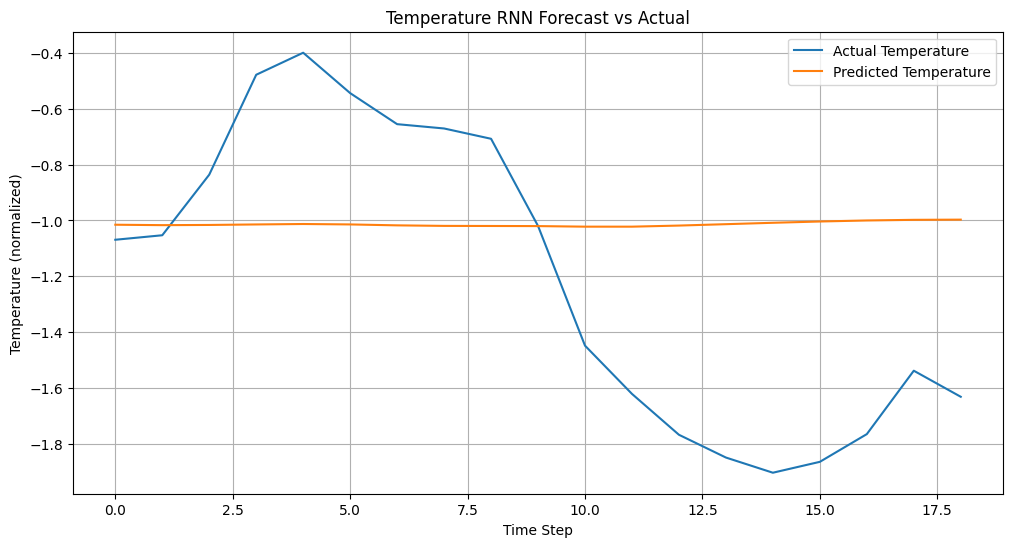

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


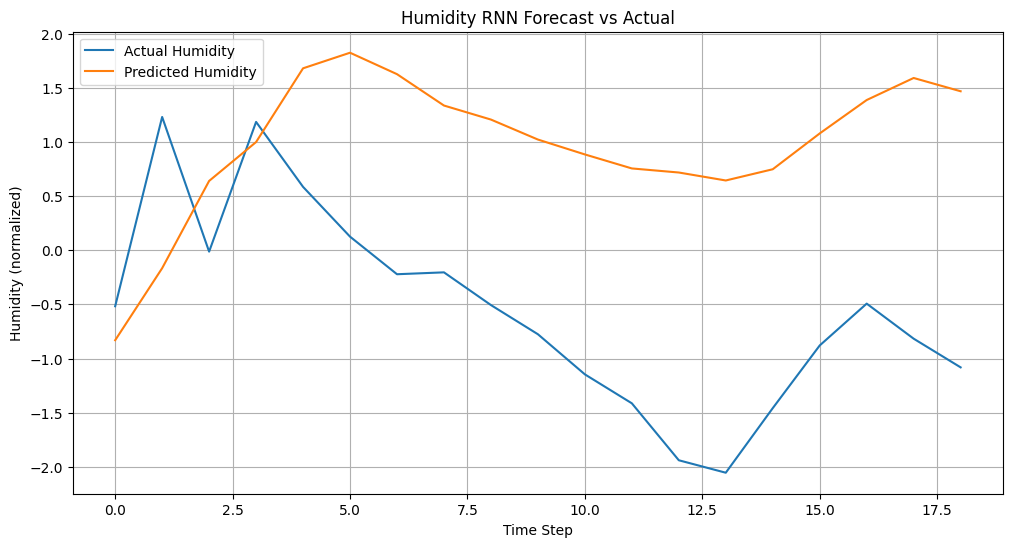

In [67]:
# Predict temperature
forecast_temp = model_temp.predict(X_test_temp)

plt.figure(figsize=(12, 6))
plt.plot(y_test_temp, label='Actual Temperature')
plt.plot(forecast_temp, label='Predicted Temperature')
plt.title('Temperature RNN Forecast vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Temperature (normalized)')
plt.legend()
plt.grid(True)
plt.show()


# Predict humidity
forecast_hum = model_hum.predict(X_test_hum)

plt.figure(figsize=(12, 6))
plt.plot(y_test_hum, label='Actual Humidity')
plt.plot(forecast_hum, label='Predicted Humidity')
plt.title('Humidity RNN Forecast vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Humidity (normalized)')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# For Temperature
y_pred_temp = forecast_temp.flatten()

mae_temp = mean_absolute_error(y_test_temp, y_pred_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
rmse_temp = np.sqrt(mse_temp)
mape_temp = np.mean(np.abs((y_test_temp - y_pred_temp) / y_test_temp)) * 100
accuracy_temp = 100 - mape_temp

print("Temperature Metrics:")
print(f"MAE: {mae_temp:.3f}")
print(f"MSE: {mse_temp:.3f}")
print(f"RMSE: {rmse_temp:.3f}")
print(f"MAPE: {mape_temp:.2f}%")
print(f"Accuracy: {accuracy_temp:.2f}%\n")


# For Humidity
y_pred_hum = forecast_hum.flatten()

mae_hum = mean_absolute_error(y_test_hum, y_pred_hum)
mse_hum = mean_squared_error(y_test_hum, y_pred_hum)
rmse_hum = np.sqrt(mse_hum)
mape_hum = np.mean(np.abs((y_test_hum - y_pred_hum) / y_test_hum)) * 100
accuracy_hum = 100 - mape_hum

print("Humidity Metrics:")
print(f"MAE: {mae_hum:.3f}")
print(f"MSE: {mse_hum:.3f}")
print(f"RMSE: {rmse_hum:.3f}")
print(f"MAPE: {mape_hum:.2f}%")
print(f"Accuracy: {accuracy_hum:.2f}%")

Temperature Metrics:
MAE: 0.485
MSE: 0.310
RMSE: 0.557
MAPE: 47.29%
Accuracy: 52.71%

Humidity Metrics:
MAE: 1.725
MSE: 3.484
RMSE: 1.867
MAPE: 564.83%
Accuracy: -464.83%


# Final guidelines
* You can use this notebook or create multiple notebooks as you fit (i.e. for each sensor, for each model).
* Do not hesitate to play around with hyper parapeters optimization. While the end goal is not to achieve the best results the effort will be valued.
* Try to mess around with the data. Do the analysis for more than one sensor and try different sampling rates. We would like to see more than one datasets as a basis for your results.